# Plot

In [1]:
import warnings
warnings.filterwarnings("ignore", message="numpy.dtype size changed")
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns

delphesDir = os.path.abspath("../MG5/Delphes")
os.environ['ROOT_INCLUDE_PATH'] = os.path.join(delphesDir,"external")

import ROOT

ROOT.gSystem.Load(os.path.join(delphesDir,"libDelphes.so"))

ROOT.gInterpreter.Declare('#include "classes/SortableObject.h"')
ROOT.gInterpreter.Declare('#include "classes/DelphesClasses.h"')
ROOT.gInterpreter.Declare('#include "external/ExRootAnalysis/ExRootTreeReader.h"')

import sys
sys.path.append('../recastCode')
from helper import getAlpha,getIP2D,getTheta2D,getJetTracks,getSigmaD0

plt.style.use('fivethirtyeight') #Set style
plt.rcParams.update({'figure.figsize' : (15,10)})  #Set general plotting options
plt.rcParams.update({
    "text.usetex": True,
    "font.family": "sans-serif",
    "font.sans-serif": ["Helvetica"]})

plt.rcParams.update({"savefig.dpi" : 300}) #Figure resolution


#Define plotting style:
sns.set_style('ticks',{'font.family':'Times New Roman', 'font.serif':'Times New Roman'})
sns.set_context('paper', font_scale=1.8)
cm = plt.colormaps['RdYlBu']

colors = sns.color_palette('Paired')

Welcome to JupyROOT 6.30/06


### Load Recast Data

In [2]:
inputFile = '../pp2ZH/Events/run_01/ctau_1mm_delphes_events.root'

In [3]:
d0 = []
d0ErrA = []
d0ErrB = []
pT = []

f = ROOT.TFile(inputFile,'read')
tree = f.Get("Delphes")
nevts = tree.GetEntries()
nevts = 5000

for ievt in range(nevts):
    tree.GetEntry(ievt)   
    weightPB = tree.Event.At(0).Weight/nevts
    jets = tree.Jet
    tracks = tree.Track        

    for j in jets:
        if j.PT < 35.0:
            continue
        if abs(j.Eta) > 2.4:
            continue
        jet_tracks = getJetTracks(j,tracks)
        if len(jet_tracks) == 0:
            continue
        for track in jet_tracks:
            d0.append(track.D0)
            d0ErrA.append(getSigmaD0(track,method='A'))
            d0ErrB.append(getSigmaD0(track,method='B'))
            pT.append(track.PT)
f.Close()

            

### Plot Distributions

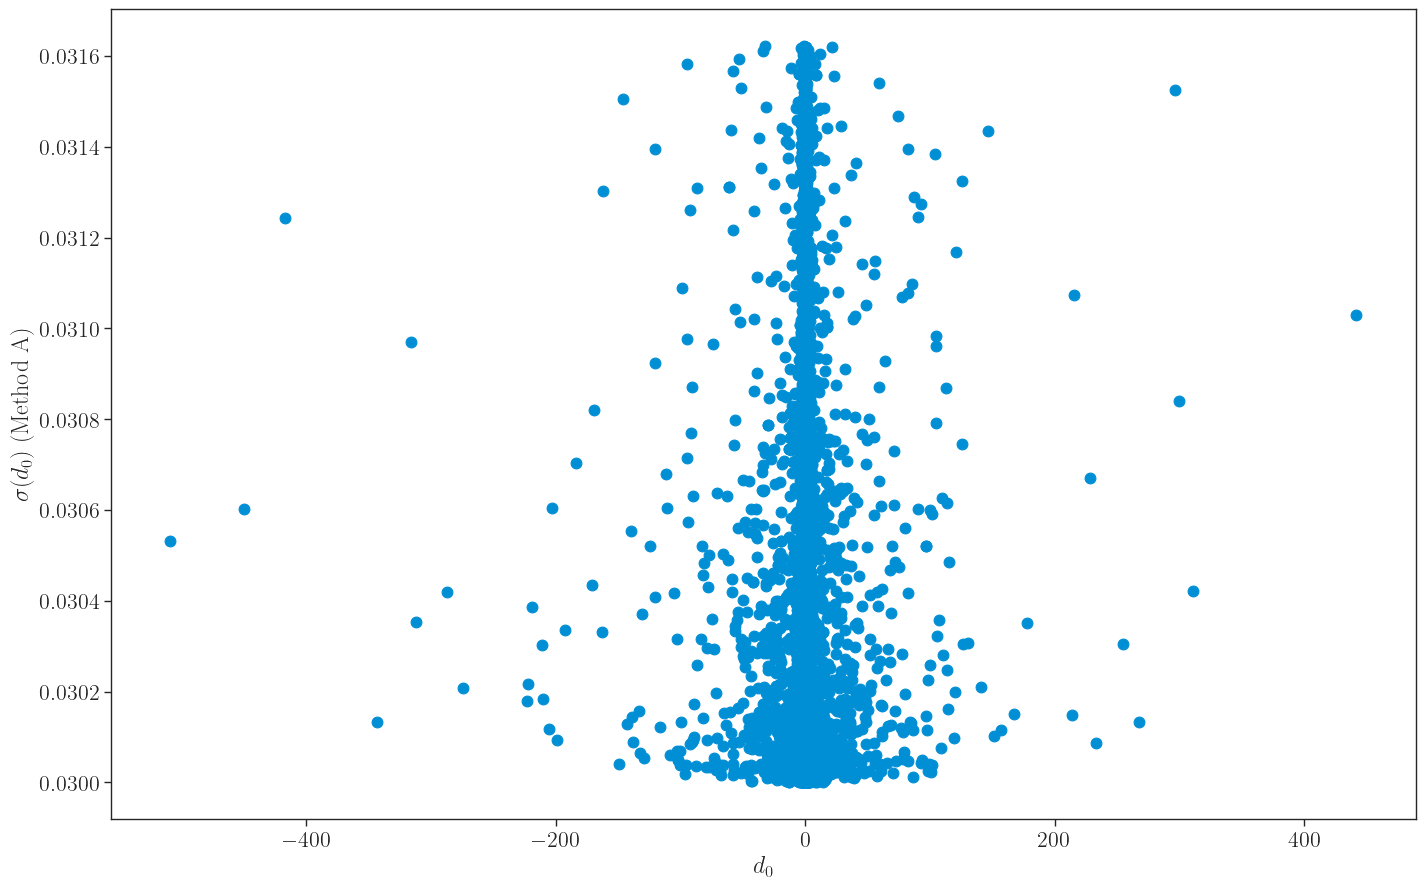

In [7]:
plt.scatter(d0,d0ErrA,s=60)
plt.xlabel(r'$d_0$')
plt.ylabel(r'$\sigma(d_0)$  (Method A)')
plt.show()

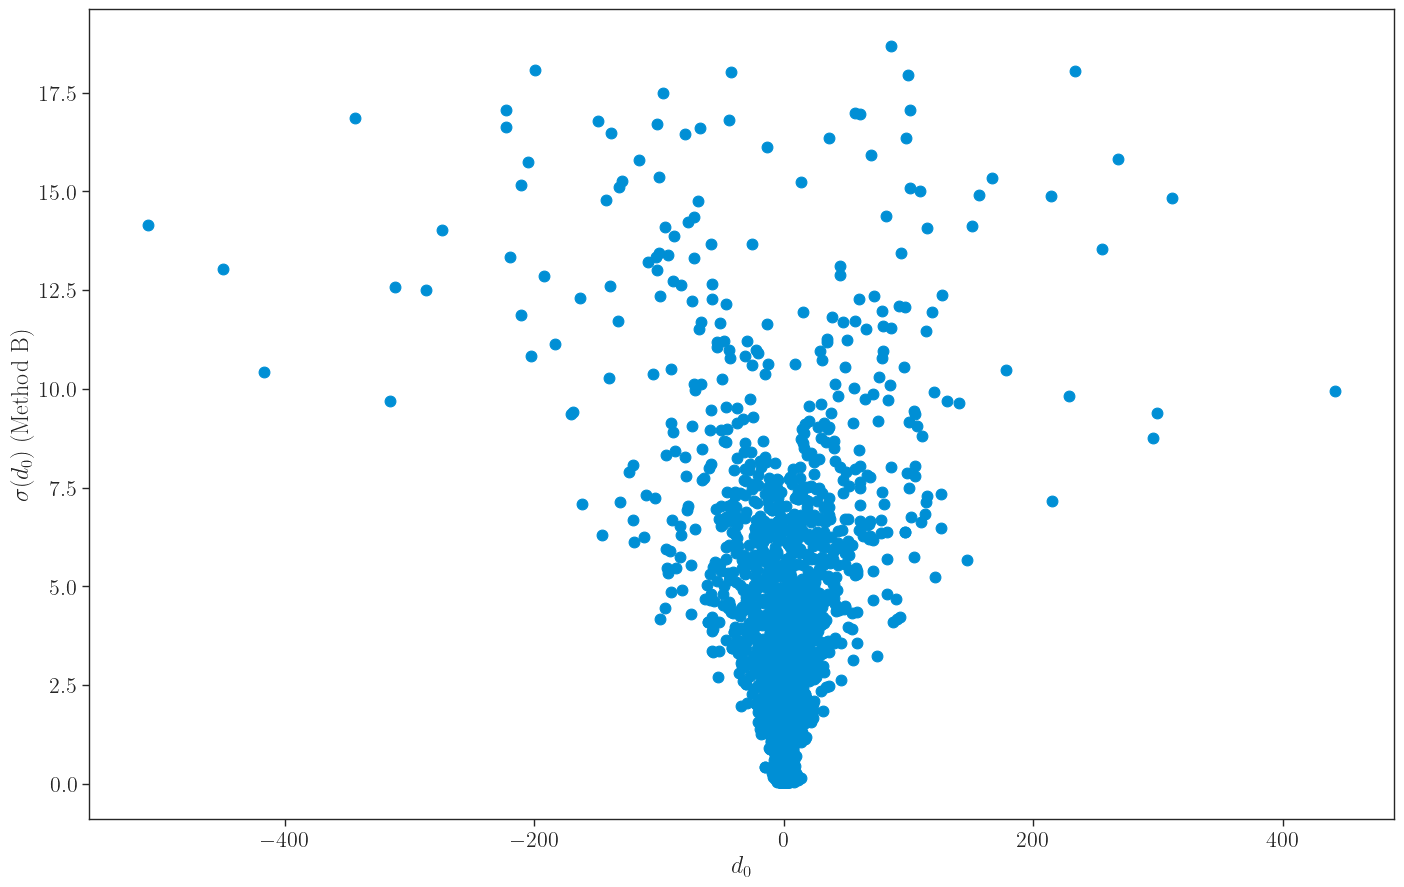

In [9]:
plt.scatter(d0,d0ErrB,s=60)
plt.xlabel(r'$d_0$')
plt.ylabel(r'$\sigma(d_0)$ (Method B)')
# plt.ylim(0.,0.1)
plt.show()

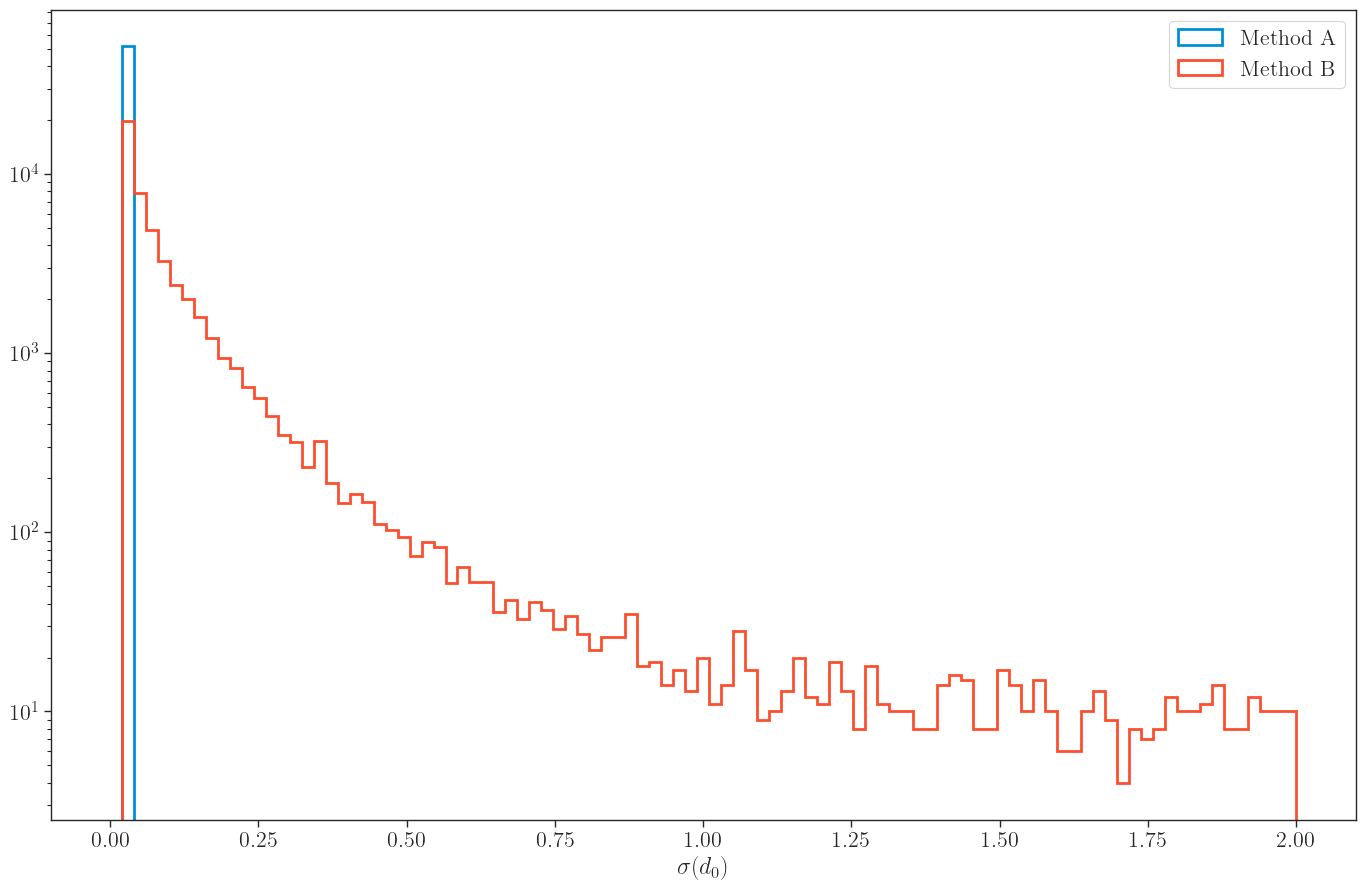

In [16]:
bins = np.linspace(0.,2.,100)
plt.hist(d0ErrA,label='Method A',bins=bins,histtype='step',linewidth=2)
plt.hist(d0ErrB,label='Method B',bins=bins,histtype='step',linewidth=2)
plt.legend()
plt.yscale('log')
plt.xlabel(r'$\sigma (d_0)$')
plt.show()